In [60]:
#imports
import torch
import torchvision
from torchvision.datasets import MNIST
import numpy as np

In [2]:
dataset = MNIST(root='data/',download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset=MNIST(root='data/',train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x23D89BC2F40>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


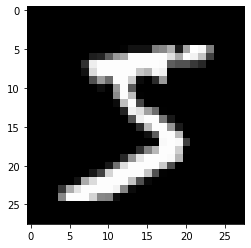

In [10]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print('Label:',label)

Label: 3


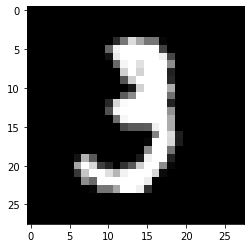

In [11]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [12]:
import torchvision.transforms as transforms

In [17]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [18]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [22]:
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [33]:
from torch.utils.data import DataLoader
batch_size=100
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size)
len(train_loader)

500

In [28]:
import torch.nn as nn
input_size=28*28
num_classes=10

#logistics Regresseion model
model=nn.Linear(input_size,num_classes)

In [29]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0261,  0.0345,  0.0345,  ..., -0.0197, -0.0220,  0.0134],
        [-0.0062,  0.0152,  0.0197,  ...,  0.0259,  0.0040,  0.0298],
        [-0.0141,  0.0236,  0.0140,  ...,  0.0293, -0.0093, -0.0062],
        ...,
        [-0.0085, -0.0058,  0.0159,  ...,  0.0137, -0.0168,  0.0120],
        [ 0.0199,  0.0309,  0.0261,  ...,  0.0173, -0.0146, -0.0095],
        [-0.0210,  0.0236, -0.0210,  ...,  0.0030,  0.0272,  0.0032]],
       requires_grad=True)

In [26]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0178,  0.0095,  0.0150, -0.0207,  0.0220, -0.0089,  0.0308, -0.0286,
        -0.0046, -0.0223], requires_grad=True)

In [30]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([7, 8, 3, 7, 1, 2, 4, 2, 1, 7, 4, 5, 2, 0, 1, 1, 4, 3, 7, 3, 4, 9, 2, 8,
        7, 0, 3, 4, 1, 7, 3, 2, 3, 3, 7, 6, 5, 0, 1, 3, 7, 9, 6, 8, 9, 1, 4, 6,
        9, 2, 1, 8, 4, 9, 4, 3, 9, 9, 8, 7, 4, 6, 1, 9, 3, 0, 1, 7, 3, 1, 6, 9,
        2, 8, 7, 9, 0, 1, 7, 2, 9, 8, 3, 0, 4, 9, 4, 7, 5, 5, 4, 0, 0, 3, 3, 0,
        3, 8, 6, 8])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [34]:
#adding layer to the model
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [35]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [36]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0226,  0.0037, -0.0221,  ...,  0.0090,  0.0234, -0.0279],
         [-0.0321,  0.0234,  0.0325,  ..., -0.0324,  0.0037,  0.0194],
         [-0.0248,  0.0021, -0.0087,  ..., -0.0123,  0.0278,  0.0117],
         ...,
         [-0.0056,  0.0065, -0.0011,  ..., -0.0080,  0.0171, -0.0053],
         [ 0.0049, -0.0036, -0.0221,  ...,  0.0327,  0.0020, -0.0035],
         [ 0.0140, -0.0134, -0.0145,  ..., -0.0122,  0.0069, -0.0055]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0144, -0.0329, -0.0199,  0.0077,  0.0080, -0.0254,  0.0259, -0.0082,
          0.0349,  0.0298], requires_grad=True)]

In [37]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([100, 1, 28, 28])
outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.0677, -0.1408, -0.0617,  0.2784, -0.0718, -0.1816,  0.1380,  0.0411,
          0.0794,  0.1014],
        [ 0.2479,  0.0440, -0.1250,  0.2901,  0.1508,  0.0332,  0.1798,  0.0418,
          0.0151,  0.0987]])


In [38]:
import torch.nn.functional as F

In [39]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0915, 0.0851, 0.0921, 0.1294, 0.0912, 0.0817, 0.1125, 0.1021, 0.1061,
         0.1084],
        [0.1154, 0.0941, 0.0795, 0.1204, 0.1048, 0.0931, 0.1078, 0.0939, 0.0915,
         0.0994]])
Sum:  0.9999999403953552


In [40]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([3, 3, 6, 9, 3, 0, 7, 0, 9, 0, 3, 3, 0, 3, 3, 9, 2, 3, 0, 3, 3, 7, 3, 3,
        4, 6, 3, 0, 7, 3, 9, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 4, 3, 3, 3, 3, 6, 8,
        0, 0, 0, 3, 6, 0, 7, 5, 5, 7, 0, 3, 0, 3, 3, 9, 6, 6, 3, 9, 3, 3, 6, 0,
        0, 6, 0, 0, 5, 9, 6, 3, 5, 0, 3, 3, 0, 6, 0, 0, 3, 3, 3, 0, 8, 5, 6, 3,
        3, 0, 9, 3])
tensor([0.1294, 0.1204, 0.1114, 0.1355, 0.1247, 0.1423, 0.1463, 0.1193, 0.1379,
        0.1161, 0.1382, 0.1305, 0.1228, 0.1408, 0.1491, 0.1269, 0.1129, 0.1241,
        0.1469, 0.1455, 0.1462, 0.1118, 0.1317, 0.1288, 0.1349, 0.1431, 0.1249,
        0.1292, 0.1487, 0.1291, 0.1437, 0.1307, 0.1305, 0.1371, 0.1358, 0.1270,
        0.1306, 0.1299, 0.1261, 0.1318, 0.1443, 0.1146, 0.1386, 0.1265, 0.1454,
        0.1358, 0.1253, 0.1253, 0.1133, 0.1211, 0.1176, 0.1230, 0.1172, 0.1285,
        0.1308, 0.1246, 0.1367, 0.1139, 0.1335, 0.1391, 0.1084, 0.1332, 0.1602,
        0.1612, 0.1133, 0.1218, 0.1213, 0.1392, 0.1395, 0.1254, 0.1226, 0.1226,
        0.1178, 0.1

In [41]:
labels

tensor([6, 8, 6, 3, 0, 7, 2, 4, 5, 5, 3, 9, 1, 9, 0, 5, 1, 9, 6, 7, 0, 1, 5, 5,
        7, 5, 5, 9, 0, 6, 0, 8, 1, 7, 7, 0, 4, 3, 3, 1, 3, 8, 2, 3, 3, 4, 8, 0,
        1, 8, 8, 7, 9, 1, 2, 8, 2, 9, 0, 7, 1, 5, 0, 3, 5, 6, 9, 4, 2, 5, 6, 1,
        1, 6, 1, 1, 6, 8, 8, 3, 8, 7, 4, 3, 5, 1, 1, 4, 5, 9, 4, 7, 0, 1, 6, 0,
        7, 1, 3, 3])

In [49]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [51]:
accuracy(outputs,labels)

tensor(0.1400)

In [54]:
torch.sum(labels==preds).item() / len(labels)

0.14

In [55]:
loss_fn = F.cross_entropy

In [56]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2810, grad_fn=<NllLossBackward0>)


In [58]:
learning_rate=0.001
otimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [59]:
def loss_batch(model, loss_func,xb,yb,opt=None,metric=None):
    #calculate loss
    preds=model(xb)
    loss=loss_func(preds,yb)
    
    if opt is not None:
        #compute gradients
        loss.backward()
        #update parameters
        opt.step()
        #Reset Gradients
        opt.zero_grad()
    
    metric_result=None
    if metric is not None:
        metric_result=metric(preds,yb)
    
    return loss.item(),len(xb),metric_result

In [67]:
def evaluate(model,loss_fn,valid_dl,metric=None):
    with torch.no_grad():
        #pass each batch through the model
        results=[loss_batch(model,loss_fn,xb,yb,metric=metric)
                for xb,yb in valid_dl]
        #separate losses,counts and metrices
        losses,nums,metrics=zip(*results)
        #total size of the datset
        total=np.sum(nums)
        # avg loss across batches
        avg_loss=np.sum(np.multiply(losses,nums)) / total
        avg_metric=None
        if metric is not None:
            #avg of metric across all batches
            avg_metric=np.sum(np.multiply(metrics,nums)) / total
        return avg_loss,total,avg_metric

In [68]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [69]:
val_loss,total,val_acc=evaluate(model,loss_fn,val_loader,metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss,val_acc))

Loss: 2.3093, Accuracy: 0.0827


In [88]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
    for epoch in range(epochs):
        #training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
        #evaluation
        result=evaluate(model,loss_fn,valid_dl,metric)
        val_loss,total,val_metric = result
        
        #print progress
        if metric is None:
            print('Epoch [{}/{}], loss: {:.4f}'
                  .format(epoch+1,epochs,val_loss))
        else:
            print('Epoch [{}/{}], loss: {:.4f}, {}: {:.4f}'
                 .format(epoch+1,epochs,val_loss,metric.__name__,val_metric))
            

In [89]:
#Redefine model and optimizer
model=MnistModel()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [90]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5], loss: 1.8687, accuracy: 0.6754
Epoch [2/5], loss: 1.5673, accuracy: 0.7471
Epoch [3/5], loss: 1.3582, accuracy: 0.7761
Epoch [4/5], loss: 1.2094, accuracy: 0.7941
Epoch [5/5], loss: 1.0997, accuracy: 0.8042


In [91]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5], loss: 1.0159, accuracy: 0.8133
Epoch [2/5], loss: 0.9502, accuracy: 0.8189
Epoch [3/5], loss: 0.8971, accuracy: 0.8233
Epoch [4/5], loss: 0.8534, accuracy: 0.8285
Epoch [5/5], loss: 0.8167, accuracy: 0.8314


In [92]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5], loss: 0.7855, accuracy: 0.8347
Epoch [2/5], loss: 0.7584, accuracy: 0.8378
Epoch [3/5], loss: 0.7349, accuracy: 0.8404
Epoch [4/5], loss: 0.7141, accuracy: 0.8423
Epoch [5/5], loss: 0.6956, accuracy: 0.8440


In [93]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5], loss: 0.6790, accuracy: 0.8456
Epoch [2/5], loss: 0.6640, accuracy: 0.8478
Epoch [3/5], loss: 0.6504, accuracy: 0.8492
Epoch [4/5], loss: 0.6380, accuracy: 0.8507
Epoch [5/5], loss: 0.6267, accuracy: 0.8513


In [95]:
#define test dataset
test_dataset=MNIST(root='data/',
                  train=False,
                  transform=transforms.ToTensor())

In [121]:
def predict_image(img,model):
    xb=img.unsqueeze(0)
    yb=model(xb)
    _,preds = torch.max(yb, dim=1)
    return preds[0].item()

In [124]:
predict_image(img,model)

7

Label: 5 , Predicted: 5


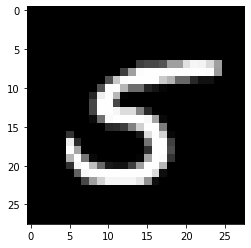

In [131]:
#lets predict
img, label = test_dataset[8909]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))